Inner product between vectors ( overlap ) using swap test. 

In [9]:
# from qiskit_ibm_runtime import QiskitRuntimeService

In [10]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from IPython.display import display, Latex
from math import pi
import math
from qiskit.circuit.library import QFT, CUGate
from qiskit.circuit.library import UGate

import numpy as np

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# circuit.h(qreg_q[1])
circuit.x(qreg_q[0])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q)
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q)

In [11]:
state = Statevector(circuit)
state.draw(output="Latex")


<IPython.core.display.Latex object>

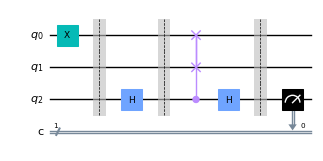

In [12]:
circuit.measure(qreg_q[2], creg_c[0])
circuit.draw(output='mpl', scale=0.5)

job id: d09aae1d-4068-42ae-815b-8ffa2218c0a8


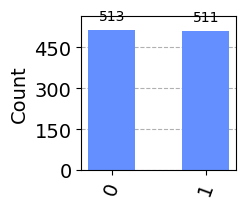

In [13]:
nShots = 5000
backend = Aer.get_backend('aer_simulator_statevector') 

job = backend.run(circuit)
print(f"job id: {job.job_id()}")
result = job.result()
plot_histogram(result.get_counts(), figsize=(2,2))

In [14]:
counts = result.get_counts()
if '0' in counts:
    b = counts['0']
else:
    b = 0
    
s = abs(1 - (2*(b/nShots)))

print("Squared Inner Product:",str(s))
print("Counts: ",counts)

Squared Inner Product: 0.7948
Counts:  {'1': 511, '0': 513}
